In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('AirlinesCluster.csv')

In [3]:
df.head()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034
3,14776,0,500,1,0,0,6952
4,97752,0,43300,26,2077,4,6935


In [4]:
df.isnull().sum()

Balance            0
QualMiles          0
BonusMiles         0
BonusTrans         0
FlightMiles        0
FlightTrans        0
DaysSinceEnroll    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 7 columns):
Balance            3999 non-null int64
QualMiles          3999 non-null int64
BonusMiles         3999 non-null int64
BonusTrans         3999 non-null int64
FlightMiles        3999 non-null int64
FlightTrans        3999 non-null int64
DaysSinceEnroll    3999 non-null int64
dtypes: int64(7)
memory usage: 218.8 KB


Balance


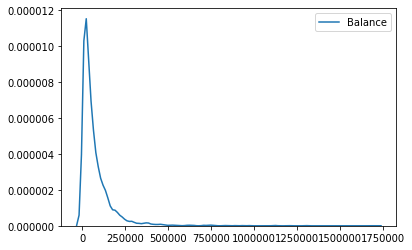

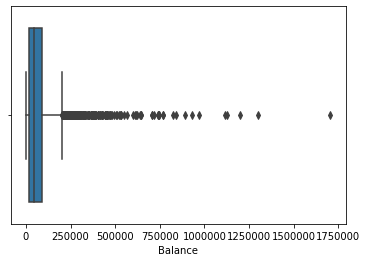

QualMiles


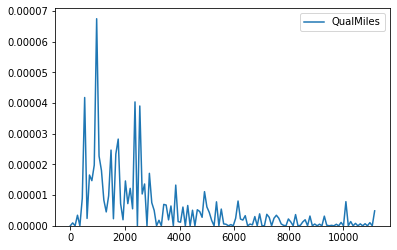

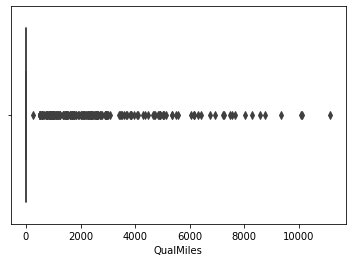

BonusMiles


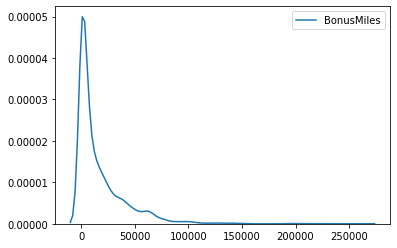

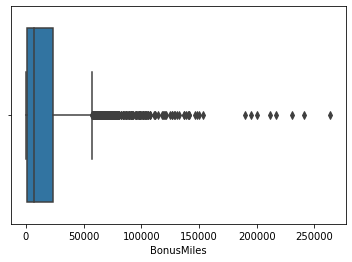

BonusTrans


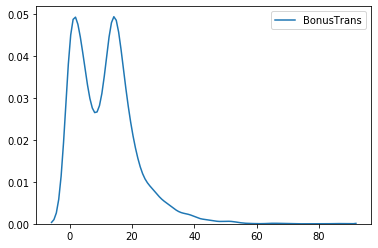

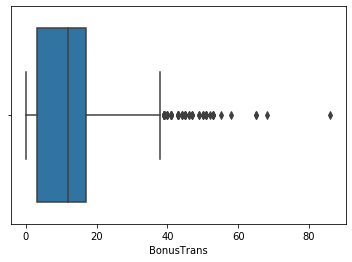

FlightMiles


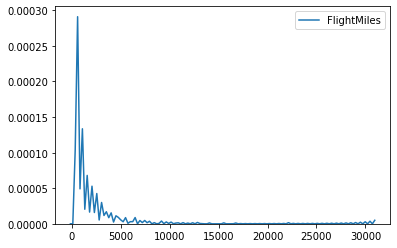

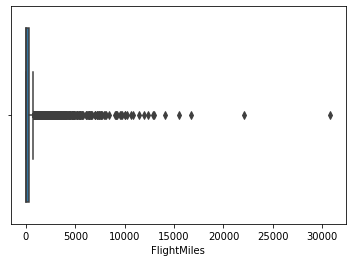

FlightTrans


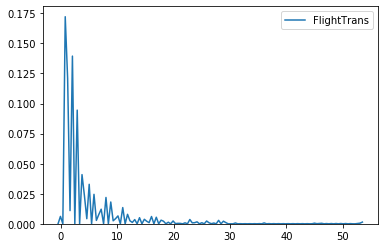

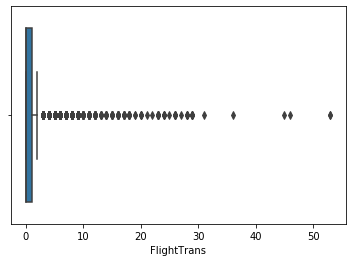

DaysSinceEnroll


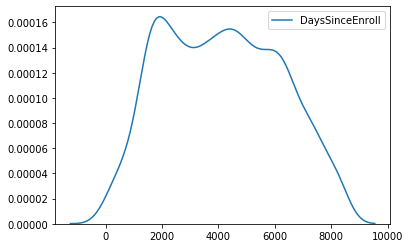

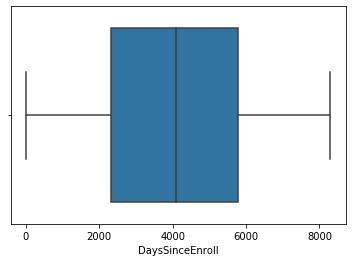

In [6]:
for i in df.columns:
    print(i)
    sns.kdeplot(df[i])
    plt.show()
    sns.boxplot(df[i])
    plt.show()

In [7]:
df.describe()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
count,3.999000e+03,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,144.114529,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,773.663804,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,0.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,0.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,0.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,11148.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000


In [8]:
df.head()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034
3,14776,0,500,1,0,0,6952
4,97752,0,43300,26,2077,4,6935


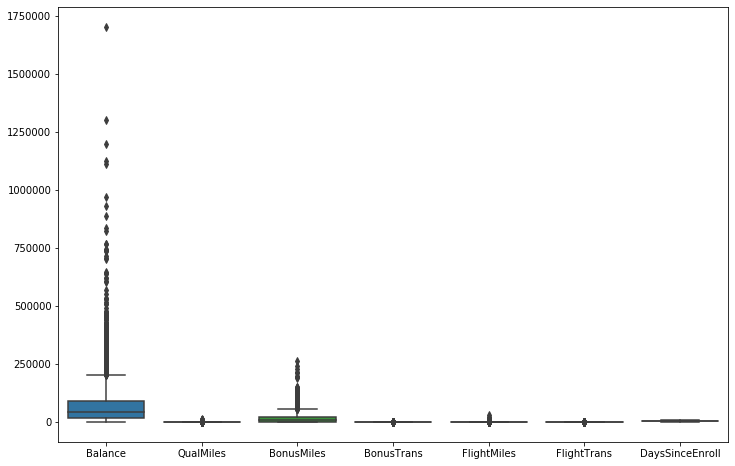

In [9]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df)

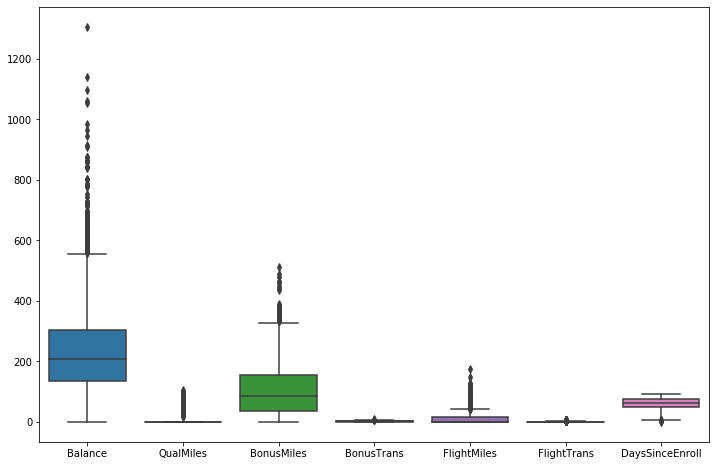

In [10]:
##Trying out if transformation removes outliers

plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(df))

In [11]:
np.sqrt(df).isnull().sum()

Balance            0
QualMiles          0
BonusMiles         0
BonusTrans         0
FlightMiles        0
FlightTrans        0
DaysSinceEnroll    0
dtype: int64

In [12]:
df1 = np.sqrt(df)

In [13]:
df1.head()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
0,167.758755,0.0,13.190906,1.000000,0.000000,0.0,83.666003
1,138.722745,0.0,14.662878,1.414214,0.000000,0.0,83.474547
2,203.356829,0.0,64.210591,2.000000,0.000000,0.0,83.868945
3,121.556571,0.0,22.360680,1.000000,0.000000,0.0,83.378654
4,312.653162,0.0,208.086520,5.099020,45.574115,2.0,83.276647


In [14]:
df.head()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034
3,14776,0,500,1,0,0,6952
4,97752,0,43300,26,2077,4,6935


In [15]:
##Let's use the original data first, and let's remove the outliers from Balance first:

In [16]:
q1 = df['Balance'].quantile(0.25)
q3 = df['Balance'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df1 = df[(df['Balance']>ll)&(df['Balance']<ul)]

In [17]:
df1.head()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034
3,14776,0,500,1,0,0,6952
4,97752,0,43300,26,2077,4,6935


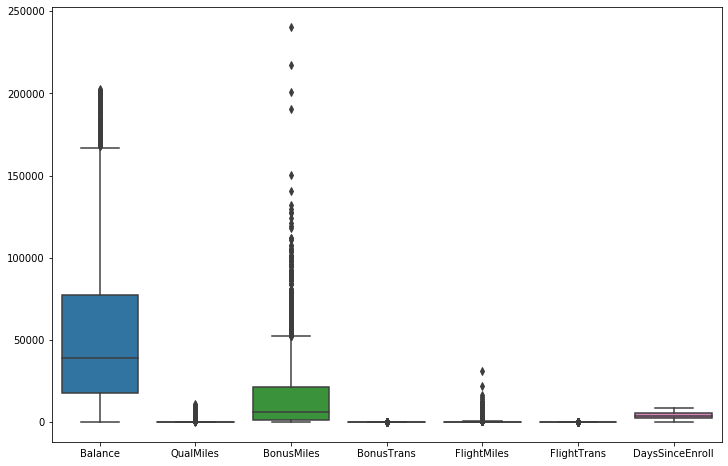

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df1)

In [19]:
df.shape

(3999, 7)

In [20]:
df1.shape

(3733, 7)

In [21]:
##Now removing outliers from BonusMiles:

In [22]:
q1 = df['BonusMiles'].quantile(0.25)
q3 = df['BonusMiles'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df2 = df1[(df1['BonusMiles']>ll)&(df1['BonusMiles']<ul)]

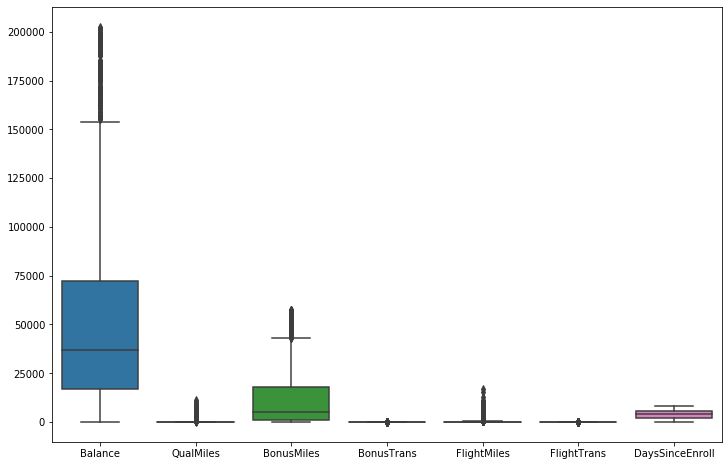

In [23]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df2)

In [24]:
##Removing outliers from FlightMiles:


In [25]:
q1 = df['FlightMiles'].quantile(0.25)
q3 = df['FlightMiles'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df3 = df2[(df2['FlightMiles']>ll)&(df2['FlightMiles']<ul)]

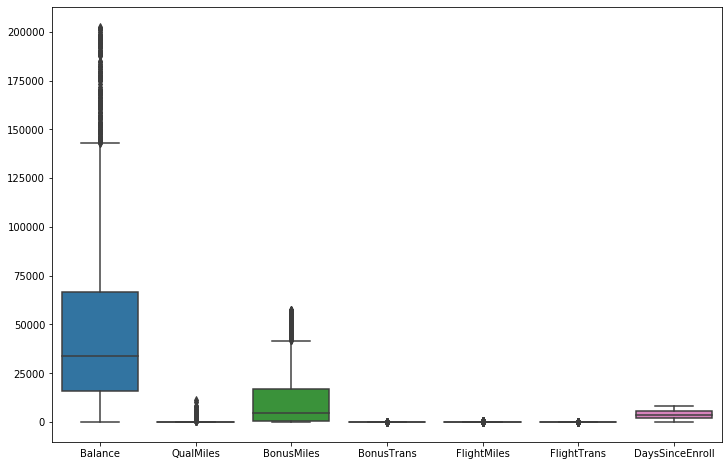

In [26]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df3)

In [27]:
##Now removing outliers from QualMiles:
q1 = df['QualMiles'].quantile(0.25)
q3 = df['QualMiles'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df4 = df3[(df3['QualMiles']>ll)&(df3['QualMiles']<ul)]

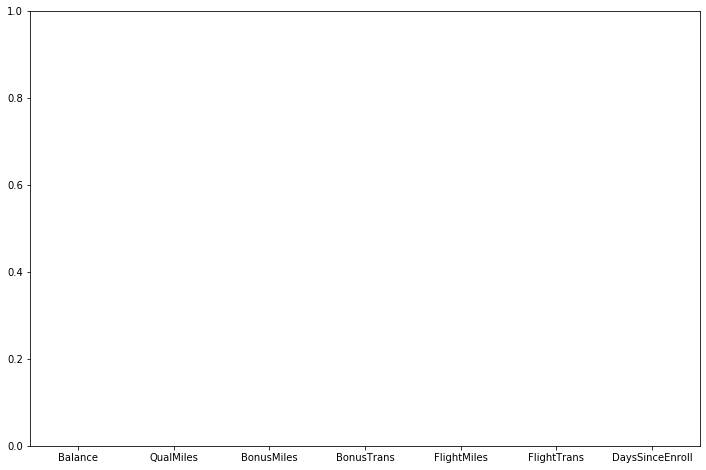

In [32]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df4)

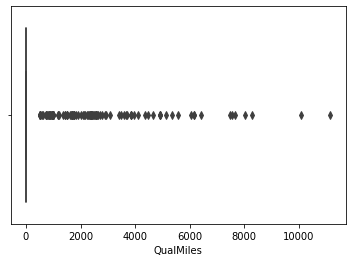

In [31]:
sns.boxplot(df3['QualMiles'])

In [33]:
##We notice that QualMiles contains most outliers, which can be influential while building a model, so we cannot remove them.
#So, Considering Outliers for QualMiles: taking df3 as final

In [34]:
df3.shape

(3105, 7)

In [35]:
df3.head()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034
3,14776,0,500,1,0,0,6952
5,16420,0,0,0,0,0,6942


In [36]:
##We need to normalize the data now: 

Balance


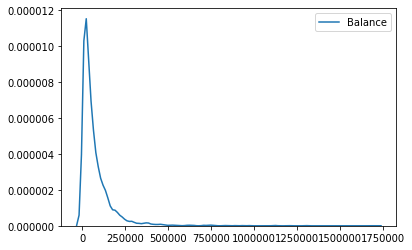

QualMiles


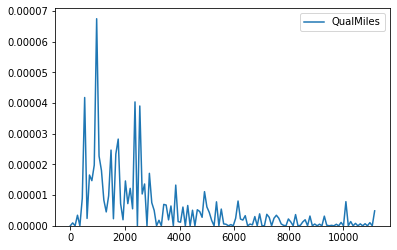

BonusMiles


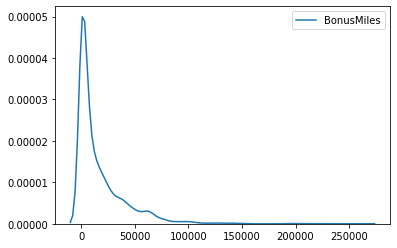

BonusTrans


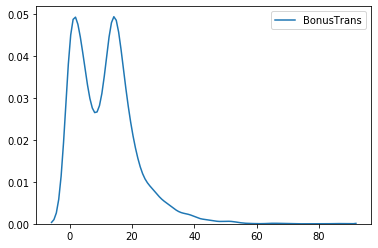

FlightMiles


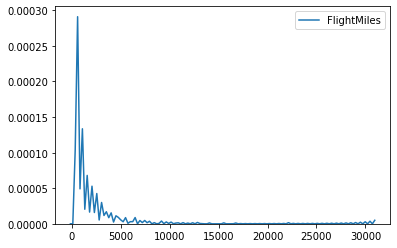

FlightTrans


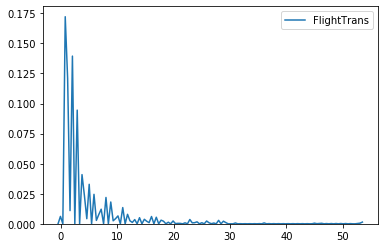

DaysSinceEnroll


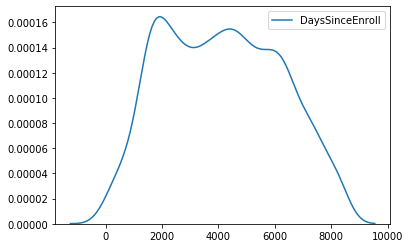

In [38]:
for i in df3.columns:
    print(i)
    sns.kdeplot(df[i])
    plt.show()

In [39]:
##As we can see above, we need to normalize data:

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df_norm = standard_scaler.fit_transform(df3)

In [41]:
from sklearn.cluster import KMeans
cluster_range = range(1,20)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(df_norm)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df[0:20]

,num_clusters,cluster_errors
0,1,21735.000000
1,2,16938.649755
2,3,13216.414623
3,4,11130.957164
4,5,10031.145899
5,6,8885.525373
6,7,8174.837254
7,8,7543.131825
8,9,7018.009123
9,10,6580.730252


Text(0, 0.5, 'Cluster Errors')

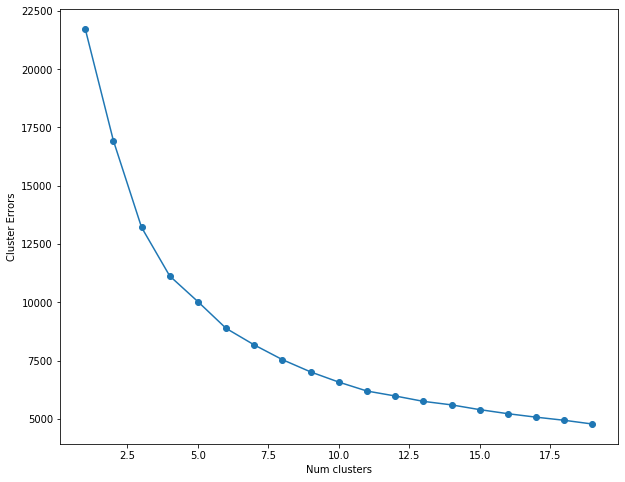

In [42]:
#Elbow plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o')
plt.xlabel('Num clusters')
plt.ylabel('Cluster Errors')

In [43]:
##4 optimum clusters, as seen from elbow curve:

In [ ]:
##Building unsupervised model:

In [44]:
model1 = KMeans(n_clusters = 4, max_iter=50)
model1.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [56]:
#analysis of clusters formed

df3.index = pd.RangeIndex(len(df3.index))
df_km = pd.concat([df3,pd.Series(model1.labels_)],axis=1)
df_km.columns = ['Balance', 'QualMiles', 'BonusMiles', 'BonusTrans', 'FlightMiles',
       'FlightTrans', 'DaysSinceEnroll','ClusterID']

In [57]:
df_km.isna().sum()

Balance            0
QualMiles          0
BonusMiles         0
BonusTrans         0
FlightMiles        0
FlightTrans        0
DaysSinceEnroll    0
ClusterID          0
dtype: int64

In [58]:
df_km

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll,ClusterID
0,28143,0,174,1,0,0,7000,0
1,19244,0,215,2,0,0,6968,0
2,41354,0,4123,4,0,0,7034,0
3,14776,0,500,1,0,0,6952,0
4,16420,0,0,0,0,0,6942,0
...,...,...,...,...,...,...,...,...
3100,18476,0,8525,4,200,1,1403,0
3101,64385,0,981,5,0,0,1395,0
3102,73597,0,25447,8,0,0,1402,1
3103,54899,0,500,1,500,1,1401,3


In [59]:
df3.head()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034
3,14776,0,500,1,0,0,6952
4,16420,0,0,0,0,0,6942


In [62]:
km_cluster_Balance = pd.DataFrame(df_km.groupby('ClusterID')['Balance'].mean())
km_cluster_QualMiles = pd.DataFrame(df_km.groupby('ClusterID')['QualMiles'].mean())
km_cluster_BonusMiles = pd.DataFrame(df_km.groupby('ClusterID')['BonusMiles'].mean())
km_cluster_BonusTrans = pd.DataFrame(df_km.groupby('ClusterID')['BonusTrans'].mean())
km_cluster_FlightMiles = pd.DataFrame(df_km.groupby('ClusterID')['FlightMiles'].mean())
km_cluster_FlightTrans = pd.DataFrame(df_km.groupby('ClusterID')['FlightTrans'].mean())
km_cluster_DaysSinceEnroll = pd.DataFrame(df_km.groupby('ClusterID')['DaysSinceEnroll'].mean())


df = pd.concat([pd.Series([0,1,2,3]),km_cluster_Balance,
km_cluster_QualMiles,
km_cluster_BonusMiles,
km_cluster_BonusTrans,
km_cluster_FlightMiles,
km_cluster_FlightTrans,
km_cluster_DaysSinceEnroll],axis=1)
df.columns = ['ClusterID','Balance', 'QualMiles', 'BonusMiles', 'BonusTrans', 'FlightMiles',
       'FlightTrans', 'DaysSinceEnroll']
df

,ClusterID,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
0,0,25835.324791,14.290226,3019.703218,5.143623,6.747318,0.045888,3507.912396
1,1,78051.160532,27.783231,23912.093047,16.623722,12.623722,0.094070,4594.627812
2,2,60148.711538,4274.384615,10244.846154,9.000000,141.096154,0.538462,3390.019231
3,3,63517.720403,62.594458,13431.869018,10.989924,473.614610,1.806045,4099.692695


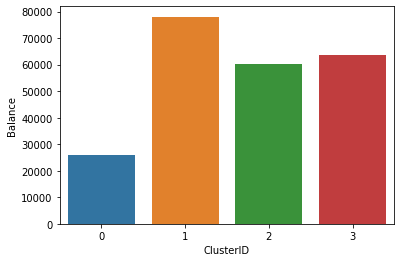

In [66]:
sns.barplot(data=df,x='ClusterID',y='Balance')

In [ ]:
#People in Cluster 1 require highest number of miles to be eligible for award travel

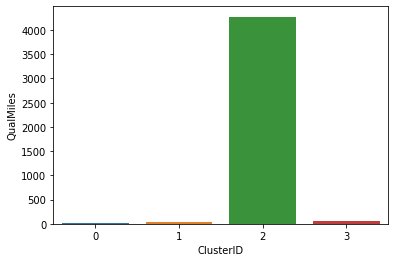

In [67]:
sns.barplot(data=df,x='ClusterID',y='QualMiles')

In [ ]:
#Cluster 2 contains people who require most number of miles to qualify for top flight status 

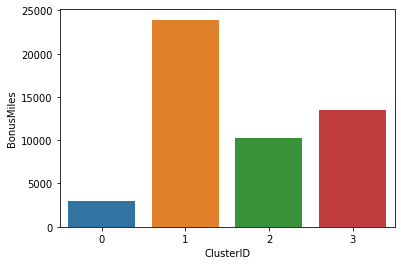

In [68]:
sns.barplot(data=df,x='ClusterID',y='BonusMiles')

In [ ]:
#Cluster 1 people have the highest number of miles earned from non-flight bonus transactions in the past 12 months

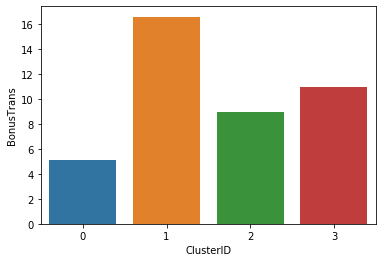

In [69]:
sns.barplot(data=df,x='ClusterID',y='BonusTrans')

In [ ]:
#Cluster 1 people have the highest number of non-flight bonus transactions in the past 12 months

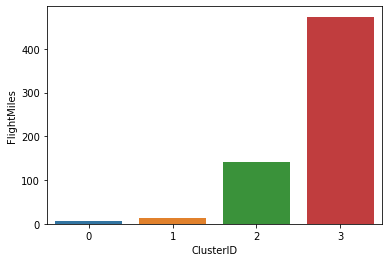

In [70]:
sns.barplot(data=df,x='ClusterID',y='FlightMiles')

In [ ]:
#Cluster 3 people have highest number of flight miles in the past 12 months, whereas we can see that flight miles are quite low
#for cluster 1 people, hence they were made to earn more flight miles through non-flight bonus transactions, so that they fly,
#and increase the business for the airline

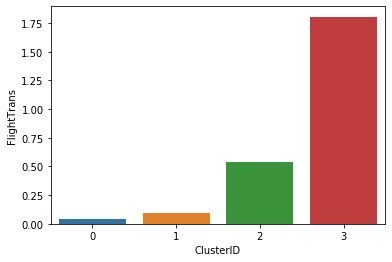

In [71]:
sns.barplot(data=df,x='ClusterID',y='FlightTrans')

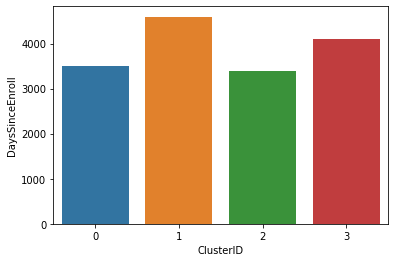

In [72]:
sns.barplot(data=df,x='ClusterID',y='DaysSinceEnroll')

In [ ]:
##In Cluster1, people have enrolled in the flight program for a very long time, longer than others, which is why they are being
#offered more flight miles through non-flight bonus transactions, so that they can increase the frequency of flying for customers
#who have been enrolled for a long time. This hasn't had much effect on the people though. The flying miles for Cluster1 are 
#still quite less.

In [ ]:
#Cluster0 has less flight miles, but the points they were awarded are lesser than the amount awarded to Cluster1, and that
#could be before people in cluster0 enrolled after the people in cluster1.

In [ ]:
##Cluster 3 is not getting much fly miles through non-flight bonus transactions because they are already fliers with high miles
##and more number of transactions than the rest.

In [73]:
df.columns

Index(['ClusterID', 'Balance', 'QualMiles', 'BonusMiles', 'BonusTrans',
       'FlightMiles', 'FlightTrans', 'DaysSinceEnroll'],
      dtype='object')

In [74]:

from scipy.cluster.hierarchy import linkage, cut_tree, dendrogram

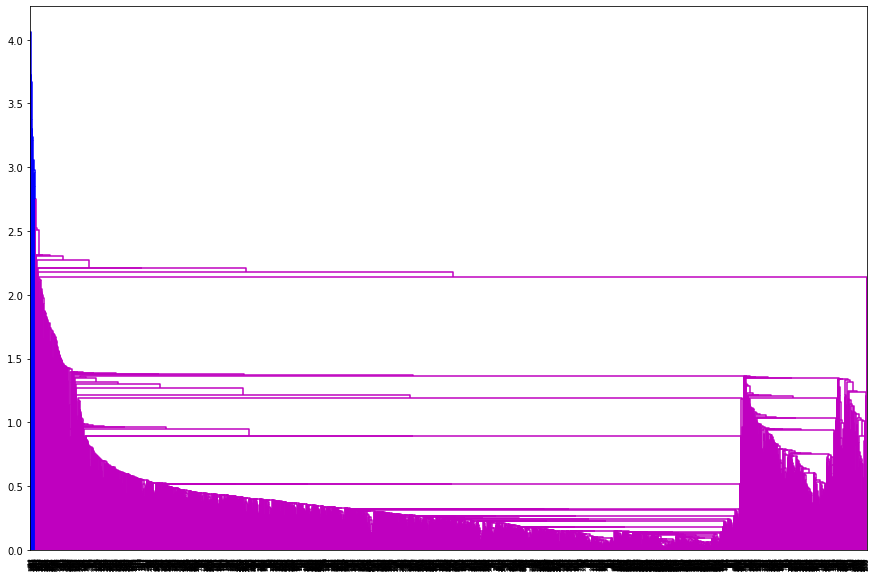

In [75]:
#Hierarchial Clustering:
plt.figure(figsize=(15,10))
mergings = linkage(df_norm, method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

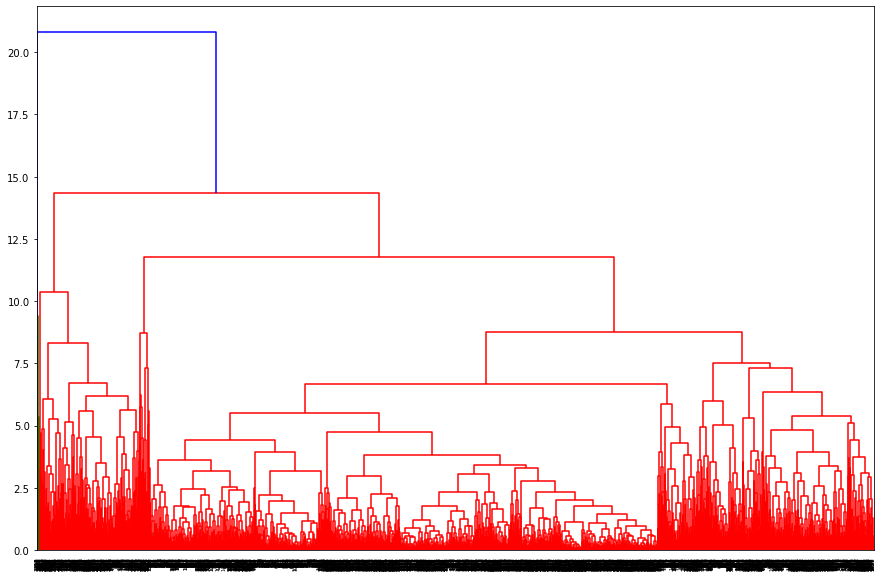

In [76]:
plt.figure(figsize=(15,10))
mergings = linkage(df_norm, method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

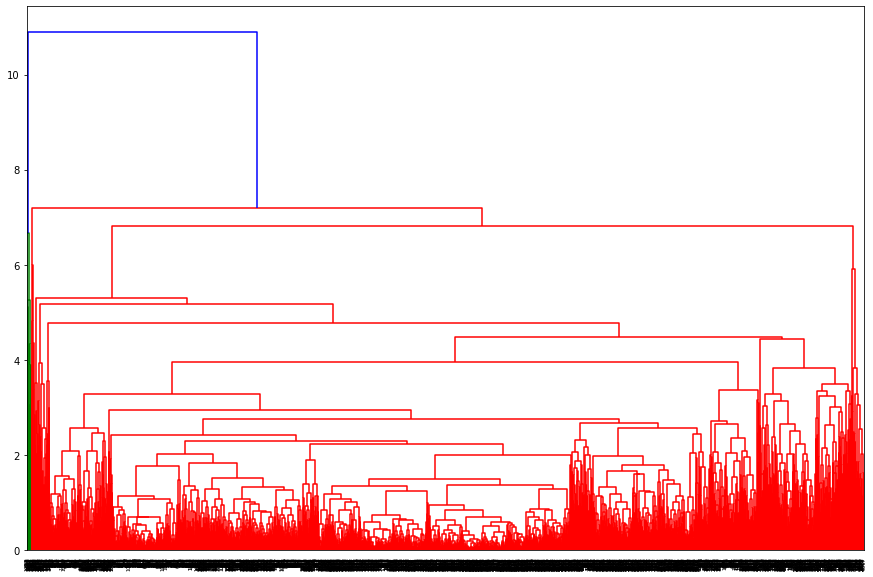

In [77]:
plt.figure(figsize=(15,10))
mergings = linkage(df_norm, method='average',metric='euclidean')
dendrogram(mergings)
plt.show()

In [78]:
##Agglomerative Clustering:

In [79]:
from sklearn.cluster import AgglomerativeClustering

his_clus = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')

cluster2 = his_clus.fit_predict(df3)

df_h = df3.copy(deep=True)
df_h['label'] = cluster2
df_h['label'].value_counts()

3    1847
1     659
0     487
2     112
Name: label, dtype: int64

In [80]:
from sklearn.cluster import AgglomerativeClustering

his_clus = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='single')

cluster2 = his_clus.fit_predict(df3)

df_h = df3.copy(deep=True)
df_h['label'] = cluster2
df_h['label'].value_counts()

0    3102
3       1
1       1
2       1
Name: label, dtype: int64

In [81]:
from sklearn.cluster import AgglomerativeClustering

his_clus = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')

cluster2 = his_clus.fit_predict(df3)

df_h = df3.copy(deep=True)
df_h['label'] = cluster2
df_h['label'].value_counts()

2    1432
0    1066
3     330
1     277
Name: label, dtype: int64

In [87]:
df_km['ClusterID'].value_counts()

0    1678
1     978
3     397
2      52
Name: ClusterID, dtype: int64

In [ ]:
##WE can compare what kmeans gave and what Agglomerative Clustering gave

In [88]:
##NOW, Principal Component Analysis:

In [89]:
X_std = StandardScaler().fit_transform(df3)

In [90]:
cov_matrix = np.cov(X_std.T)

In [91]:
cov_matrix

array([[ 1.00032216,  0.06065409,  0.43675713,  0.33078394,  0.16009772,
         0.13317192,  0.23001039],
       [ 0.06065409,  1.00032216,  0.01590789,  0.00199057,  0.06574545,
         0.06050977, -0.01550008],
       [ 0.43675713,  0.01590789,  1.00032216,  0.61852561,  0.08781011,
         0.04714319,  0.14245044],
       [ 0.33078394,  0.00199057,  0.61852561,  1.00032216,  0.08121164,
         0.06471593,  0.11118096],
       [ 0.16009772,  0.06574545,  0.08781011,  0.08121164,  1.00032216,
         0.81553229,  0.03226166],
       [ 0.13317192,  0.06050977,  0.04714319,  0.06471593,  0.81553229,
         1.00032216,  0.02377912],
       [ 0.23001039, -0.01550008,  0.14245044,  0.11118096,  0.03226166,
         0.02377912,  1.00032216]])

In [92]:
#Step3: Eigen values and eigen vector

In [93]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print(eig_vals)
print(eig_vecs)

[2.17061221 1.67515839 0.18344485 0.36739801 0.64198599 0.96533008
 0.99832563]
[[ 4.50265645e-01  2.10952182e-01 -6.54098879e-03 -1.98470152e-01
  -8.19977207e-01  1.99608383e-01 -3.34770582e-02]
 [ 7.09037207e-02 -8.24414927e-02 -3.32551470e-03 -1.13792223e-03
   1.26842711e-01  2.88909671e-01 -9.42658919e-01]
 [ 4.78327957e-01  3.73635395e-01 -5.35000834e-02  7.45975655e-01
   1.24132315e-01 -2.32684300e-01 -5.20211912e-02]
 [ 4.49776960e-01  3.48259580e-01  2.86506805e-02 -6.32574007e-01
   4.12702776e-01 -3.21861204e-01 -3.90768203e-02]
 [ 4.08974191e-01 -5.65759719e-01  7.07433406e-01  5.71512985e-02
   4.73156316e-02 -3.81170116e-02  7.23607680e-02]
 [ 3.88263325e-01 -5.84255432e-01 -7.04131350e-01 -2.31545192e-02
   6.18018779e-02 -3.72119879e-02  7.97238159e-02]
 [ 2.07673454e-01  1.62406785e-01 -2.33454505e-04  1.32796061e-02
   3.46060186e-01  8.46234860e-01  3.07324388e-01]]


In [94]:
eigen_pairs = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

In [95]:
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted (eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained",cum_var_exp)

Cumulative Variance Explained [ 30.9987591   54.92188609  69.17908756  82.96507585  92.13335065
  97.38020329 100.        ]


In [96]:
df.shape[1]

8

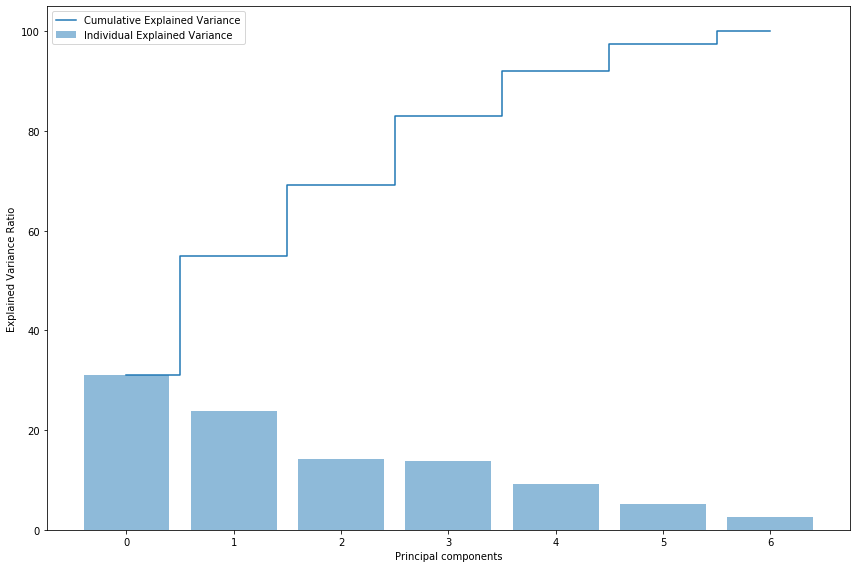

In [114]:
plt.figure(figsize=(12,8))
plt.bar(range(7),var_exp,alpha=0.5,align='center',label='Individual Explained Variance')
plt.step(range(7),cum_var_exp,where='mid',label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [100]:
from sklearn.decomposition import PCA


In [115]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df3)
X1 = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])

In [116]:
X1.head()

,PC1,PC2
0,-20914.256021,-7787.490622
1,-29705.103187,-6404.469631
2,-7259.241832,-5876.856277
3,-34078.925469,-5448.701719
4,-32529.341086,-6191.079311


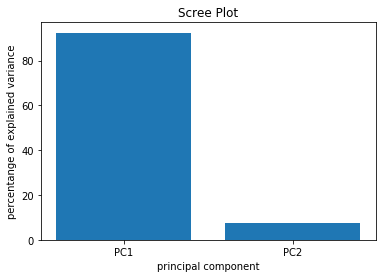

In [117]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('percentange of explained variance')
plt.xlabel('principal component')
plt.title('Scree Plot')
plt.show()